# COVID-19 Analysis and Visualizations (India)
Analysing and Visualizing the popular pandemic COVID-19 for India. We will gather data from different sources and plot tables, graphs, charts and maps to statistically analyse the growth of the disease and the danger it is causing in India.

## Contents
[1. Acknowledgements and References](#1.-Acknowledgements-and-References)  
[2. Disclaimer](#2.-Disclaimer)  
[3. Managing Libraries](#3.-Managing-Libraries)  
&emsp;&emsp;[3.1. Installing Modules](#3.1.-Installing-Modules)  
&emsp;&emsp;[3.2. Importing Modules](#3.2.-Importing-Modules)  
[4. Managing Datasets](#4.-Managing-Datasets)  
&emsp;&emsp;[4.1. Scraping and Downloading Datasets](#4.1.-Scraping-and-Downloading-Datasets)  
&emsp;&emsp;[4.2. Scraping India Dataset](#4.2.-Scraping-India-Dataset)  
&emsp;&emsp;[4.3. Importing and Displaying Datasets](#4.3.-Importing-and-Displaying-Datasets)  
[5. Preprocessing Data](#5.-Preprocessing-Data)  
&emsp;&emsp;[5.1. Color Pallette](#5.1.-Color-Pallette)  
&emsp;&emsp;[5.2. Cleaning and Modifying Data](#5.2.-Cleaning-and-Modifying-Data)  
&emsp;&emsp;[5.3. Converting JSON to GeoJSON](#5.3.-Converting-JSON-to-GeoJSON)  
[6. Plotting Tables](#6.-Plotting-Tables)  
[7. Plotting Maps](#7.-Plotting-Maps)  
&emsp;&emsp;[7.1. State-wise Cases Map Plot](#7.1.-State-wise-Cases-Map-Plot)  
&emsp;&emsp;[7.2. District-wise Cases Map Plot](#7.1.-District-wise-Cases-Map-Plot)  
[8. Plotting Graphs](#8.-Plotting-Graphs)  
&emsp;&emsp;[8.1. Age-wise Count of Patients](#8.1.-Age-wise-Count-of-Patients)  
&emsp;&emsp;[8.2. Date-wise Count of Cases](#8.2.-Date-wise-Count-of-Cases)  
&emsp;&emsp;[8.3. Tranmission of Disease in India](#8.3.-Tranmission-of-Disease-in-India)  
&emsp;&emsp;[8.4. Travelled/Non-Travelled Infected Patients](#8.4.-Travelled/Non-Travelled-Infected-Patients)  
&emsp;&emsp;[8.5. Reason for Non-Travelled Patients to Get Infected](#8.5.-Reason-for-Non-Travelled-Patients-to-Get-Infected)  
&emsp;&emsp;[8.6. Interval of Days to Recover/Death](#8.6.-Interval-of-Days-to-Recover/Death)  

---
## 1. Acknowledgements and References
[🔝](#Contents)  
**Datasets:**
>[Covid-19 India GitHub](https://github.com/covid19india)  
>[Datameet](https://github.com/datameet)

**Notebooks:**
>[COVID-19 Analysing Growth & SIR Modeling (India)](https://www.kaggle.com/duttadebadri/covid-19-analysing-growth-sir-modeling-india)

---
## 2. Disclaimer
[🔝](#Contents)

>- The data is scrapped from *covid19india GitHub Repository* and *Datameet GitHub Repository*, hence, any variation in that data will also be reflected in this notebook  
>- All the data displayed here, is referenced from different sources, hence, the accuracy of data is dependent on these sources, if any incorrect information is displayed in this notebook, it is from the sources
>- Data from these sources is in the entirety of the data publishers, I do not claim the credit for the data

---
## 3. Managing Libraries
[🔝](#Contents)

### 3.1. Installing Modules
[🔝](#Contents)

In [1]:
# !pip install bs4
# !pip install requests
# !pip install ipywidgets
# !pip install numpy
# !pip install pandas
# !pip install json
# !pip install wordcloud
# !pip install plotly
# !pip install matplotlib
# !python -m pip install https://github.com/sgillies/topojson/archive/master.zip

### 3.2. Importing Modules
[🔝](#Contents)

In [2]:
# essential libraries
from datetime import date, datetime, timedelta
from functools import reduce
import random
import os

# scraping and downloading
from bs4 import BeautifulSoup
import requests

# python widgets
from ipywidgets import Dropdown, VBox

# managing data
import numpy as np
import pandas as pd
import json
import topojson

# visualization
from wordcloud import WordCloud, STOPWORDS
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# html embedding
from IPython.core.display import display, HTML

---
## 4. Managing Datasets
[🔝](#Contents)

### 4.1. Scraping and Downloading Datasets
[🔝](#Contents)

In [3]:
india_map_url = 'https://raw.githubusercontent.com/covid19india/covid19india-react/master/public/maps/india.json'

if not os.path.exists('datasets'):
    os.mkdir('datasets')
    
_ = open('datasets/india_map.json',
         'wb').write(requests.get(india_map_url).content)

In [4]:
url = 'https://github.com/covid19india/covid19india-react/tree/master/public/maps'
html = requests.get(url).content
soup = BeautifulSoup(html, 'html5lib')
rows = soup.findAll('table')[0].findAll('tbody')[1].findAll('td', attrs={'class': 'content'})
urls = [rows[i].findAll('a')[0]['href'] for i in range(1, len(rows))]
filenames = []

for url in urls:
    filenames.append(url.split('/')[-1])
    _ = open('datasets/{}'.format(url.split('/')[-1]),
             'wb').write(requests.get('https://github.com{}'.format(url.replace('blob', 'raw'))).content)

### 4.2. Scraping India Dataset
[🔝](#Contents)

In [5]:
# # patient-wise dataset, containing patient's age, sex, status and transmission
# url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml#'
# html = requests.get(url).content
# soup = BeautifulSoup(html, 'html5lib')
# rows = soup.find('table').findAll('tbody')[0].findAll('tr')

# header = [i.text for i in rows[0].find_all('td')]
# contents = []

# for j in range(len(rows)):
#     contents.append([i.text for i in rows[j].find_all('td')])
    
# covid_19_india = pd.DataFrame(contents[2:len(contents)], columns=header)
# covid_19_india = covid_19_india.loc[:, :'Backup Notes']
# covid_19_india.to_csv('datasets/covid_19_india.csv', index=False)

In [6]:
# state-wise dataset, containing confirmed, death and recovered cases for all the states of India
url = 'https://raw.githubusercontent.com/datameet/covid19/master/data/mohfw.json'
covid_19_india_agg = pd.DataFrame(pd.DataFrame(dict(json.loads(requests.get(url).content.decode('utf-8')))['rows'])['value'].tolist())
covid_19_india_agg.drop(columns=['_id', '_rev', 'source', 'type'], inplace=True)
covid_19_india_agg['state'] = covid_19_india_agg['state'].str.upper()
covid_19_india_agg['report_time'] = pd.to_datetime(np.array(covid_19_india_agg['report_time'].str.split('T').tolist())[:, 0])
covid_19_india_agg.columns = ['Date', 'State ISO', 'Confirmed India', 'Confirmed Foreign', 'Recovered', 'Death', 'Confirmed']
covid_19_india_agg = covid_19_india_agg[['Date', 'State ISO', 'Confirmed', 'Confirmed India', 'Confirmed Foreign', 'Recovered', 'Death']]
india_iso_codes = pd.read_csv('datasets/india_iso_codes.csv')
covid_19_india_agg = pd.merge(covid_19_india_agg, india_iso_codes, how='left', left_on='State ISO', right_on='Code').drop(columns=['Code'], axis=1)
covid_19_india_agg = covid_19_india_agg[['Date', 'State ISO', 'State', 'Confirmed', 'Confirmed India', 'Confirmed Foreign', 'Recovered', 'Death']]
covid_19_india_agg = covid_19_india_agg.groupby(['Date', 'State'], as_index=False)[['State ISO', 'Confirmed', 'Confirmed India', 'Confirmed Foreign', 'Recovered', 'Death']].last()
covid_19_india_agg.to_csv('datasets/covid_19_india_agg.csv', index=False)

### 4.3. Importing and Displaying Datasets
[🔝](#Contents)

In [7]:
covid_19_india = pd.read_csv('datasets/covid_19_india.csv')
covid_19_india_agg = pd.read_csv('datasets/covid_19_india_agg.csv')
india_states_lat_lon = pd.read_csv('datasets/india_states_lat_lon.csv')

display(covid_19_india.head())
display(covid_19_india_agg.head())
display(india_states_lat_lon.head())

display(covid_19_india.info())
display(covid_19_india_agg.info())
display(india_states_lat_lon.info())

display(covid_19_india.describe())
display(covid_19_india_agg.describe())
display(india_states_lat_lon.describe())

Patient Number State Patient Number Date Announced Age Bracket Gender  \
0             1.0             KL-TS-P1     30/01/2020          20      F   
1             2.0             KL-AL-P1     02/02/2020         NaN    NaN   
2             3.0             KL-KS-P1     03/02/2020         NaN    NaN   
3             4.0                DL-P1     02/03/2020          45      M   
4             5.0                TS-P1     02/03/2020          24      M   

              Detected City Detected District Detected State State code  \
0                  Thrissur          Thrissur         Kerala         KL   
1                 Alappuzha         Alappuzha         Kerala         KL   
2                 Kasaragod         Kasaragod         Kerala         KL   
3  East Delhi (Mayur Vihar)        East Delhi          Delhi         DL   
4                 Hyderabad         Hyderabad      Telangana         TG   

  Current Status                                              Notes  \
0      Recovered                               Travelled from Wuhan   
1      Recovered                               Travelled from Wuhan   
2      Recovered                               Travelled from Wuhan   
3      Recovered                      Travelled from Austria, Italy   
4      Recovered  Travelled from Dubai to Bangalore on 20th Feb,...   

  Contracted from which Patient (Suspected) Nationality Type of transmission  \
0                                       NaN       India             Imported   
1                                       NaN       India             Imported   
2                                       NaN       India             Imported   
3                                       NaN       India             Imported   
4                                       NaN       India             Imported   

  Status Change Date                                           Source_1  \
0         14/02/2020  https://twitter.com/vijayanpinarayi/status/122...   
1         14/02/2020  https://www.indiatoday.in/india/story/kerala-r...   
2         14/02/2020  https://www.indiatoday.in/india/story/kerala-n...   
3         15/03/2020  https://www.indiatoday.in/india/story/not-a-ja...   
4         02/03/2020  https://www.deccanherald.com/national/south/qu...   

                                            Source_2  \
0  https://weather.com/en-IN/india/news/news/2020...   
1  https://weather.com/en-IN/india/news/news/2020...   
2  https://twitter.com/ANI/status/122422148580539...   
3  https://economictimes.indiatimes.com/news/poli...   
4  https://www.indiatoday.in/india/story/coronavi...   

                                            Source_3  \
0                                 Student from Wuhan   
1                                                NaN   
2  https://weather.com/en-IN/india/news/news/2020...   
3                                                NaN   
4  https://www.thehindu.com/news/national/coronav...   

                                 Backup Notes  
0                                         NaN  
1                          Student from Wuhan  
2                          Student from Wuhan  
3         Travel history to Italy and Austria  
4  Travel history to Dubai, Singapore contact

Date   State State ISO  Confirmed  Confirmed India  \
0  2020-01-30  Kerala        KL          1              1.0   
1  2020-02-02  Kerala        KL          2              2.0   
2  2020-02-03  Kerala        KL          3              3.0   
3  2020-03-02   Delhi        DL          1              1.0   
4  2020-03-02  Kerala        KL          3              3.0   

   Confirmed Foreign  Recovered  Death  
0                0.0          0      0  
1                0.0          0      0  
2                0.0          0      0  
3                0.0          0      0  
4                0.0          0      0

States           States Joint   Latitude  Longitude
0  Andaman and Nicobar  andamannicobarislands  11.667026  92.735983
1       Andhra Pradesh          andhrapradesh  14.750429  78.570026
2    Arunachal Pradesh       arunachalpradesh  27.100399  93.616601
3                Assam                  assam  26.749981  94.216667
4                Bihar                  bihar  25.785414  87.479973

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13060 entries, 0 to 13059
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient Number                             12323 non-null  float64
 1   State Patient Number                       2100 non-null   object 
 2   Date Announced                             12322 non-null  object 
 3   Age Bracket                                1508 non-null   object 
 4   Gender                                     2386 non-null   object 
 5   Detected City                              1460 non-null   object 
 6   Detected District                          10151 non-null  object 
 7   Detected State                             12321 non-null  object 
 8   State code                                 12320 non-null  object 
 9   Current Status                             12320 non-null  object 
 10  Notes                 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               947 non-null    object 
 1   State              947 non-null    object 
 2   State ISO          947 non-null    object 
 3   Confirmed          947 non-null    int64  
 4   Confirmed India    398 non-null    float64
 5   Confirmed Foreign  398 non-null    float64
 6   Recovered          947 non-null    int64  
 7   Death              947 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 59.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   States        36 non-null     object 
 1   States Joint  36 non-null     object 
 2   Latitude      36 non-null     float64
 3   Longitude     36 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


None

Patient Number
count    12323.000000
mean      6162.000000
std       3557.488018
min          1.000000
25%       3081.500000
50%       6162.000000
75%       9242.500000
max      12323.000000

Confirmed  Confirmed India  Confirmed Foreign   Recovered       Death
count   947.000000       398.000000         398.000000  947.000000  947.000000
mean    116.381204        15.474874           1.552764   10.848997    3.466737
std     275.263820        25.865144           3.528364   28.919795   14.051089
min       0.000000         0.000000           0.000000    0.000000    0.000000
25%       4.000000         1.250000           0.000000    0.000000    0.000000
50%      17.000000         6.000000           0.000000    1.000000    0.000000
75%      83.000000        19.000000           1.000000    9.000000    2.000000
max    2919.000000       183.000000          14.000000  295.000000  187.000000

Latitude  Longitude
count  36.000000  36.000000
mean   22.817747  81.689233
std     6.928339   7.495501
min     8.900373  72.136230
25%    18.784459  76.459999
50%    23.817899  78.270845
75%    27.399993  88.401622
max    34.299959  94.216667

---
## 5. Preprocessing Data
[🔝](#Contents)

### 5.1. Color Pallette
[🔝](#Contents)

In [8]:
cnf = '#a6a6a6'  # grey
dth = '#ff4d4d'  # red
rec = '#4dff4d'  # green
act = '#ffc04d'  # orange

HTML('''
<table>
    <tr><th style="text-align: center;">Code</th>
        <th style="text-align: center;">Color</th><tr>
    <tr><td style="text-align: center;">Confirmed</td>
        <td bgcolor={}></td></tr>
    <tr><td style="text-align: center;">Death</td>
        <td bgcolor={}></td></tr>
    <tr><td style="text-align: center;">Recovered</td>
        <td bgcolor={}></td></tr>
    <tr><td style="text-align: center;">Active</td>
        <td bgcolor={}></td></tr>
</table>
'''.format(cnf, dth, rec, act))

### 5.2. Cleaning and Modifying Data
[🔝](#Contents)

In [9]:
covid_19_india.drop(columns=[
    'Patient Number',
    'State Patient Number',
    'Detected City',
    'State code',
    'Contracted from which Patient (Suspected)',
    'Source_1',
    'Source_2',
    'Source_3',
    'Backup Notes'
], inplace=True)

In [10]:
# renaming columns, filling in missing values and changing data type
covid_19_india = covid_19_india.rename(columns={
    'Date Announced': 'Start Date',
    'Age Bracket': 'Age',
    'Detected District': 'District',
    'Detected State': 'State',
    'Current Status': 'Status',
    'Status Change Date': 'End Date',
    'Type of transmission': 'Transmission'
})

covid_19_india = covid_19_india.replace('28-35', '32')
covid_19_india['Age'] = covid_19_india['Age'].replace(['M', 'F'], 0).fillna(0)
covid_19_india['Age'] = covid_19_india['Age'].astype(int)

### 5.3. Converting JSON to GeoJSON
[🔝](#Contents)  
Since, Plotly only supports GeoJSON files for custom map plots, we are converting India's map's json file to geojson format

In [11]:
# districts
states_geojson = {}

for i in filenames:
    try:
        with open('datasets/{}'.format(i)) as f:
            json_data = f.read()
            india_json = json.loads(json_data)

        topo_features = india_json['objects'][i.replace('.json', '_district')]['geometries']
        scale = india_json['transform']['scale']
        translate = india_json['transform']['translate']

        geo_json = dict(type='FeatureCollection', features=[])

        for k, tfeature in enumerate(topo_features):
            try:
                geo_feature = dict(id=k, type='Feature')
                geo_feature['properties'] = tfeature['properties']
                geo_feature['geometry'] = topojson.geometry(
                    tfeature, india_json['arcs'], scale, translate)
                geo_json['features'].append(geo_feature)
            except KeyError:
                pass
        
        states_geojson[i.replace('.json', '')] = geo_json
    except KeyError:
        pass

In [12]:
# states
with open('datasets/india_map.json') as f:
    json_data = f.read()
    india_json = json.loads(json_data)

topo_features = india_json['objects']['india']['geometries']
scale = india_json['transform']['scale']
translate = india_json['transform']['translate']

geo_json = dict(type='FeatureCollection', features=[])

for k, tfeature in enumerate(topo_features):
    try:
        geo_feature = dict(id=k, type='Feature')
        geo_feature['properties'] = tfeature['properties']
        geo_feature['geometry'] = topojson.geometry(
            tfeature, india_json['arcs'], scale, translate)
        geo_json['features'].append(geo_feature)
    except KeyError:
        pass

In [13]:
states_extended = pd.merge(india_states_lat_lon, pd.DataFrame(states_geojson.keys(), columns=['States Joint']), how='left')
districts = []

for i in states_geojson.keys():
    for j in range(len(states_geojson[i]['features'])):
        districts.append([states_geojson[i]['features'][j]['properties']['st_nm'].replace('JAMMU & KASHMIR', 'Jammu and Kashmir'),
                          states_geojson[i]['features'][j]['properties']['district']])

covid_19_india_states = pd.merge(covid_19_india, pd.DataFrame(districts, columns=['State', 'District']), how='right')

---
## 6. Plotting Tables
[🔝](#Contents)

In [14]:
india_data_table = covid_19_india_agg.groupby('State', as_index=False)[['Confirmed', 'Death', 'Recovered']].max()
india_data_table = india_data_table.sort_values(
    'Confirmed', ascending=False).reset_index(drop=True)
india_data_table.style.background_gradient(cmap='Greys', subset=['Confirmed'])\
                        .background_gradient(cmap='Reds', subset=['Death'])\
                        .background_gradient(cmap='Greens', subset=['Recovered'])

---
## 7. Plotting Maps
[🔝](#Contents)

### 7.1. State-wise Cases Map Plot
[🔝](#Contents)

In [15]:
states = [geo_json['features'][i]['properties']['st_nm']
          for i in range(len(geo_json['features']))]

fig_state = go.Figure(go.Choroplethmapbox(
    geojson=geo_json,
    locations=india_data_table['State'],
    z=india_data_table['Confirmed'],
    text=['Confirmed=' + (str(india_data_table[india_data_table['State'] == i]['Confirmed'].values[0])) +\
          '<br>Death=' + (str(india_data_table[india_data_table['State'] == i]['Death'].values[0])) +\
          '<br>Recovered=' + (str(india_data_table[india_data_table['State'] == i]['Recovered'].values[0])) for i in india_data_table['State']],
    hoverinfo='location+text',
    colorscale='Viridis',
    marker_opacity=0.8,
    marker_line_width=0,
    colorbar_title='Color Code',
    featureidkey='properties.st_nm'
))

fig_state.update_layout(mapbox_style='carto-positron',
                  mapbox_zoom=2.8,
                  mapbox_center={'lat': 23, 'lon': 78},
                  title=dict(text='State-wise Cases Map Plot', x=0.5))
fig_state.show()

### 7.2. District-wise Cases Map Plot
[🔝](#Contents)

In [29]:
state_val = 'Andaman and Nicobar'

select_state = Dropdown(
    options=states_extended['States'],
    value=state_val,
    description='Select State'
)

def on_change(change):
    global state_val

    if change['type'] == 'change' and change['name'] == 'value':
        state_val = change['new']
        update_map()

select_state.observe(on_change)

fig_district = go.FigureWidget(go.Choropleth(
    geojson=states_geojson[states_extended[states_extended['States'] == state_val]['States Joint'].values[0]],
    locations=covid_19_india_states[covid_19_india_states['State'] == state_val]['District'].sort_values().unique(),
    z=np.log(covid_19_india_states[covid_19_india_states['State'] == state_val].groupby('District')['Start Date'].count().sort_index() + 1),
    text=['Count=' + str(i) for i in covid_19_india_states[covid_19_india_states['State'] == state_val].groupby('District')['Start Date'].count().sort_index()],
    hoverinfo='location+text',
    hoverlabel=dict(namelength=-1),
    colorscale='Viridis',
    marker_opacity=0.8,
    marker_line_width=0,
    colorbar_title='Color Code',
    featureidkey='properties.district'))

fig_district.update_geos(
    fitbounds='geojson',
    visible=False)

fig_district.update_layout(title=dict(text=('Total Count of Patients for {} = {}'.format(state_val, covid_19_india[covid_19_india['State'] == state_val]['State'].count())), x=0.5))

def update_map():
    with fig.batch_update():
        fig_district.data[0].geojson = states_geojson[states_extended[states_extended['States'] == state_val]['States Joint'].values[0]]
        fig_district.data[0].locations = covid_19_india_states[covid_19_india_states['State'] == state_val]['District'].sort_values().unique()
        fig_district.data[0].z = np.log(covid_19_india_states[covid_19_india_states['State'] == state_val].groupby('District')['Start Date'].count().sort_index() + 1)
        fig_district.data[0].text=['Count=' + str(i) for i in covid_19_india_states[covid_19_india_states['State'] == state_val].groupby('District')['Start Date'].count().sort_index()]
        fig_district.layout.title.text = 'Total Count of Patients for {} = {}'.format(state_val, covid_19_india[covid_19_india['State'] == state_val]['State'].count())
        
VBox([select_state, fig_district])

---
## 8. Plotting Graphs
[🔝](#Contents)

### 8.1. Age-wise Count of Patients
[🔝](#Contents)

In [17]:
male_count = [covid_19_india[(covid_19_india['Age'] == i) & (
    covid_19_india['Gender'] == 'M')]['Start Date'].count() for i in range(100)]
female_count = [covid_19_india[(covid_19_india['Age'] == i) & (
    covid_19_india['Gender'] == 'F')]['Start Date'].count() for i in range(100)]
total_count = [covid_19_india[(covid_19_india['Age'] == i)]
               ['Start Date'].count() for i in range(100)]

fig = go.Figure(go.Scatter(
    x=np.arange(1, 100),
    y=[covid_19_india[covid_19_india['Age'] == i]['Start Date'].count()
       for i in range(1, 100)],
    fill='tozeroy',
    text=['Age=' + str(i) +
          '<br>Male Count=' + str(male_count[i]) +
          '<br>Female Count=' + str(female_count[i]) +
          '<br>Unknown=' + str(total_count[i] - male_count[i] - female_count[i]) +
          '<br>Total Count=' + str(total_count[i]) for i in range(1, 100)],
    hoverinfo='text'))

fig.update_layout(title=dict(text='Count of Patients by Age', x=0.5),
                  xaxis_title='Age', yaxis_title='Count')
fig.show()

### 8.2. Date-wise Count of Cases
[🔝](#Contents)

In [18]:
fig = go.Figure(go.Scatter(
    x=pd.to_datetime(covid_19_india_agg['Date'].unique()),
    y=covid_19_india_agg.groupby('Date')['Confirmed'].sum(),
    fill='tozeroy',
    text=['Date=' + pd.to_datetime(covid_19_india_agg['Date'].unique()[i]).strftime('%d-%b-%y') +
          '<br>Total Cases=' + str(covid_19_india_agg.groupby('Date')['Confirmed'].sum()[i]) for i in range(len(covid_19_india_agg['Date'].unique()))],
    hoverinfo='text'))

# fig.add_trace(go.Scatter(
#     x=[pd.to_datetime('2020/03/25') for _ in range(3)],
#     y=[min(fig.data[0].y), max(fig.data[0].y) / 2, max(fig.data[0].y)],
#     fill='tozeroy',
#     mode='lines+text',
#     text=['', 'Lockdown in India\t', ''],
#     textposition='middle left',
#     hoverinfo='skip',
#     marker_color='grey',
#     line_dash='dash'))

fig.update_layout(title=dict(text='Count of Cases by Date', x=0.5),
                  xaxis_title='Date', yaxis_title='Count', showlegend=False,
                  annotations=[dict(x=pd.to_datetime('2020-03-25') + (pd.to_datetime(covid_19_india_agg['Date'].unique()).max() - pd.to_datetime('2020-03-25')) / 2,
                                    y=max(covid_19_india_agg.groupby('Date')['Confirmed'].sum()) / 2,
                                    text='Lockdown in India', showarrow=False)],
                  shapes=[dict(
                      type='rect',
                      xref='x',
                      yref='paper',
                      x0=pd.to_datetime('2020-03-25'),
                      y0=0,
                      x1=pd.to_datetime(covid_19_india_agg['Date'].unique()).max(),
                      y1=1,
                      fillcolor='pink',
                      opacity=0.5,
                      layer='below',
                      line_width=0)])
fig.show()

### 8.3. Tranmission of Disease in India
[🔝](#Contents)

In [19]:
fig_1 = go.Figure(go.Bar(
    x=['Local', 'Foreign'],
    y=[covid_19_india_agg['Confirmed India'].sum(), covid_19_india_agg['Confirmed Foreign'].sum()],
    text=['Transmission Mode=Local' + '<br>Count=' + str(int(covid_19_india_agg['Confirmed India'].sum())),
          'Transmission Mode=Foreign' + '<br>Count=' + str(int(covid_19_india_agg['Confirmed Foreign'].sum()))],
    hoverinfo='text',
    marker_color=[act, dth]
))

fig_1.update_layout(xaxis_title='Transmission Mode', yaxis_title='Count')

fig_2 = go.Figure(go.Scatter(
    x=covid_19_india['Nationality'].dropna().unique(),
    y=covid_19_india['Nationality'].value_counts(),
    text=['Nationality=' + str(covid_19_india['Nationality'].dropna().unique()[i]) +\
          '<br>Count=' + str(covid_19_india['Nationality'].value_counts()[i]) for i in range(len(covid_19_india['Nationality'].dropna().unique()))],
    hoverinfo='text'
))

fig_2.update_layout(xaxis_title='Nationality of Patient', yaxis_title='Count')

fig = make_subplots(rows=1, cols=2, subplot_titles=['Count of Patients by Local and Foreign Transmission',
                                                    'Count of Patients by Nationality of Patients'])
fig.add_trace(fig_1.data[0], row=1, col=1)
fig.add_trace(fig_2.data[0], row=1, col=2)
fig.update_layout(showlegend=False)
fig.show()

### 8.4. Travelled/Non-Travelled Infected Patients
[🔝](#Contents)

In [20]:
travel_words = ['travel', 'travelled', 'details', 'awaited']
no_travel = covid_19_india[reduce(lambda x, y: x & y, [covid_19_india['Notes'].str.lower().str.contains(word) == False for word in travel_words])]
travel = covid_19_india[~covid_19_india.isin(no_travel).all(1)]

negative = (no_travel['Start Date'].nunique()* 100) // covid_19_india['Start Date'].nunique()
positive = (travel['Start Date'].nunique() * 100) // covid_19_india['Start Date'].nunique()

fig = go.Figure(go.Pie(labels=['Patients with Travel History', 'Patients w/o Travel History'],
                       values=[negative, positive], hoverinfo='label'))

fig.update_layout(title=dict(text='Patients With and Without Travel History', x=0.5))
fig.show()

### 8.5. Reason for Non-Travelled Patients to Get Infected
[🔝](#Contents)

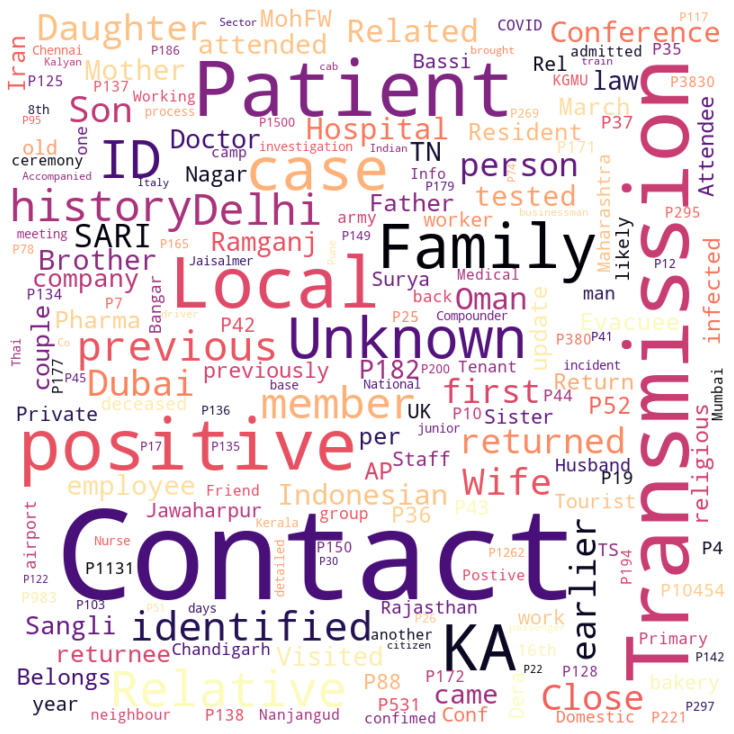

In [21]:
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, collocations=False)\
            .generate(no_travel['Notes'].str.cat(sep=' '))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.recolor(colormap='magma', random_state=3), interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

### 8.6. Interval of Days to Recover/Death
[🔝](#Contents)

In [22]:
start_dates = pd.to_datetime([datetime.strptime(i, '%d/%m/%Y').strftime('%Y-%m-%d') for i in covid_19_india['Start Date'].dropna()])
end_dates = pd.to_datetime([datetime.strptime(i, '%d/%m/%Y').strftime('%Y-%m-%d') for i in covid_19_india['End Date'].dropna()])

interval = pd.Series([(end_dates[i] - start_dates[i]).days for i in range(min(len(end_dates), len(start_dates)))])
interval = interval[interval.values >= 0]

fig = go.Figure(go.Scatter(
    x=interval.sort_values().unique(),
    y=interval.sort_values().value_counts(),
    text=['Interval of Days=' + str(interval.sort_values().unique()[i]) +\
          '<br>Count of Patients=' + str(interval.sort_values().value_counts().reset_index(drop=True)[i]) for i in range(len(interval.unique()))],
    hoverinfo='text',
    mode='markers+lines'
))

fig.update_layout(title=dict(text='Interval of Days to Recover/Death', x=0.5),
                  xaxis_title='Days', yaxis_title='Count of Patients')
fig.show()